In [ ]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load the MNIST Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


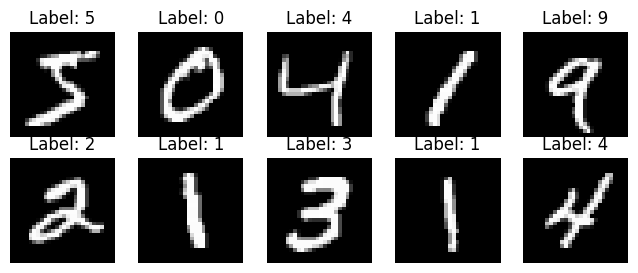

In [ ]:
# Visualize a few samples
plt.figure(figsize=(8, 3))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

In [ ]:
# Preprocess the Data

# Normalize pixel values to 0–1 range
X_train = X_train / 255.0
X_test = X_test / 255.0
# Flatten 28x28 images to 784 features
X_train = X_train.reshape((X_train.shape[0], 28*28))
X_test = X_test.reshape((X_test.shape[0], 28*28))
# One-hot encode labels (e.g., 5 -> [0,0,0,0,0,1,0,0,0,0])
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
# Build the ANN Model
model = Sequential([
Dense(128, activation='relu', input_shape=(784,)),
Dense(64, activation='relu'),
Dense(10, activation='softmax') # Output layer for 10 classes
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the Model
model.compile(
optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
# Train the Model
history = model.fit(
X_train, y_train_cat,
epochs=10,
batch_size=128,
validation_split=0.1,
verbose=1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8192 - loss: 0.6396 - val_accuracy: 0.9623 - val_loss: 0.1353
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9559 - loss: 0.1496 - val_accuracy: 0.9707 - val_loss: 0.0983
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9707 - loss: 0.0999 - val_accuracy: 0.9748 - val_loss: 0.0836
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9784 - loss: 0.0728 - val_accuracy: 0.9785 - val_loss: 0.0716
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9824 - loss: 0.0572 - val_accuracy: 0.9753 - val_loss: 0.0766
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9875 - loss: 0.0440 - val_accuracy: 0.9762 - val_loss: 0.0714
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9890 - loss: 0.0361 - val_accuracy: 0.9813 - val_loss: 0.0663
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9918 - loss: 0.0269 - val_accuracy: 0.

In [ ]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")


Test Accuracy: 97.71%


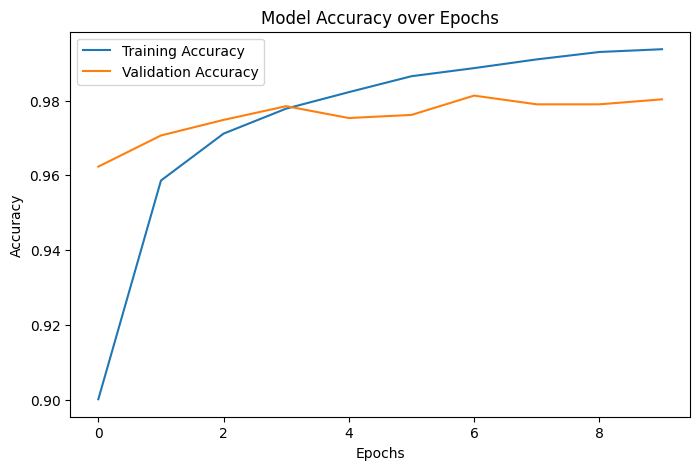

In [ ]:
# Plot Training Curves
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


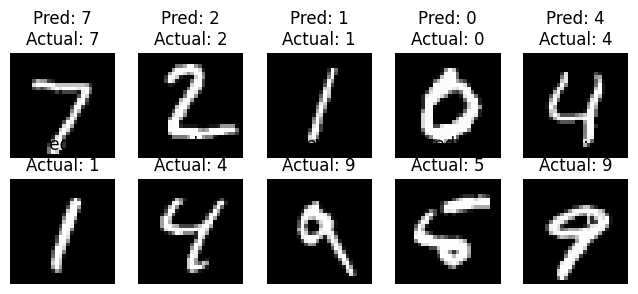

In [ ]:
# Display Sample Predictions
predictions = model.predict(X_test[:10])
predicted_classes = np.argmax(predictions, axis=1)
plt.figure(figsize=(8,3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {predicted_classes[i]}\nActual: {y_test[i]}")
    plt.axis('off')
plt.show()